Step 1.1 — Load the Dataset

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df= sns.load_dataset('titanic')

Step 1.2 — Display First Few Rows

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing Value Percentage

In [8]:
missing_percent=df.isnull().sum()/len(df)*100
cols_drop=missing_percent[missing_percent>60].index
df=df.drop(columns=cols_drop)


In [9]:
# df.drop(columns=['deck'],inplace=True)

handle missing values

In [10]:
df.select_dtypes(include=['int64','float64']).columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

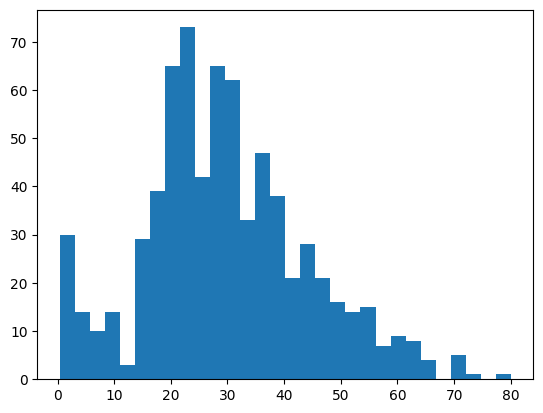

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['age'].dropna(),bins=30)
plt.show()

In [12]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

here we can understand that, Mean > Median → Right-skewed 

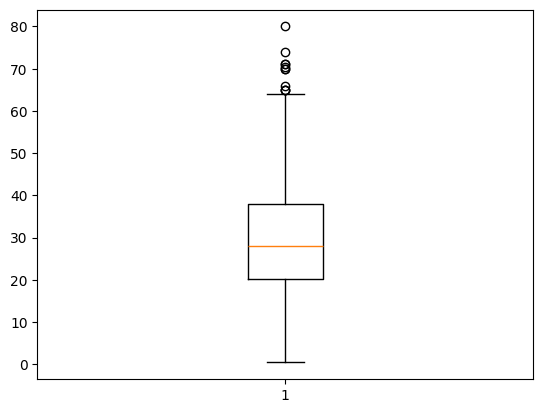

In [13]:
plt.boxplot(df['age'].dropna())
plt.show()

Points far above whiskers → outliers

Median closer to bottom → right skew

Confirms median is safer

In [14]:
df['age'].fillna(df['age'].median(),inplace=True)

C:\Users\Fathimathulmina ch\AppData\Local\Temp\ipykernel_12832\2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


do for another feature

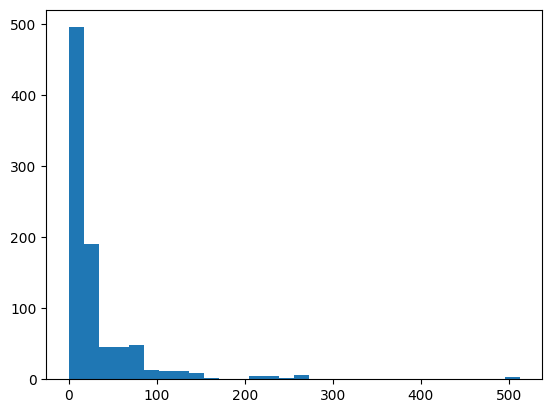

In [15]:
plt.hist(df['fare'], bins=30)
plt.show()

In [16]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

embark and deck are not numerical, it is categorical

In [17]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [18]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [19]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

handle outliers

In [20]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_age = df[(df['age'] < lower) | (df['age'] > upper)]
len(outliers_age)


66

Not all detected outliers must be treated, age is most importand old age people can exist

lets do for other features

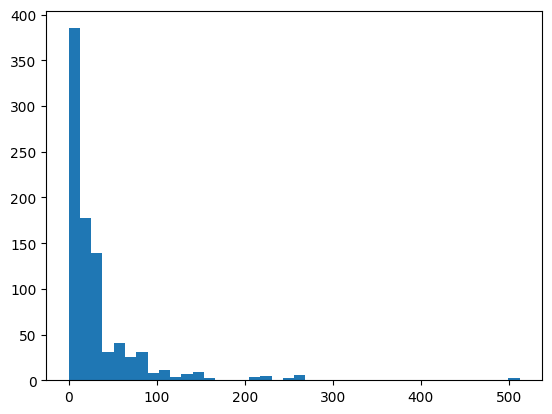

In [21]:
plt.hist(df['fare'],bins=40)
plt.show()

Most fares are small

Very few extremely high fares

Long right tail → heavily right-skewe

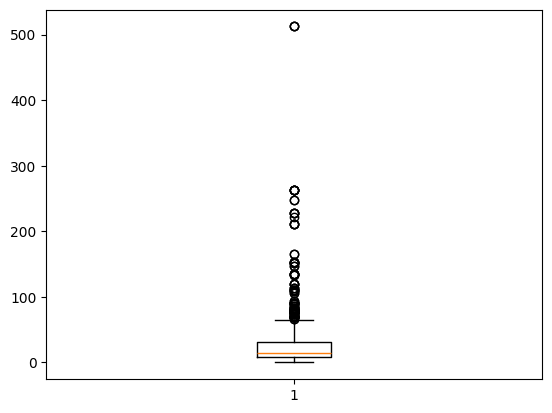

In [22]:
plt.boxplot(df['fare'])
plt.show()

In [23]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_fare = df[df['fare'] > upper]
len(outliers_fare)


116

Apply Log Transformation


Reduces skewness

Pulls extreme values closer

Preserves order

In [24]:
df['fare_log']=np.log1p(df['fare'])

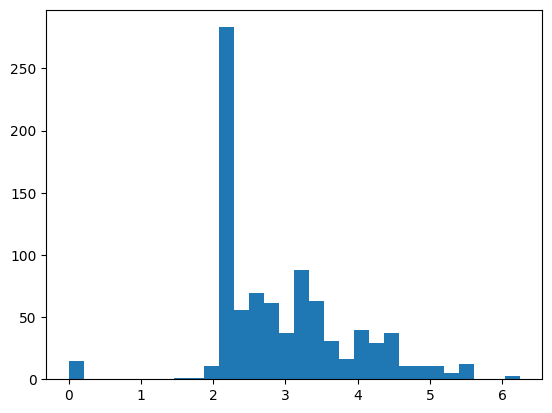

In [25]:
plt.hist(df['fare_log'],bins=30)
plt.show()


FEATURE SCALING

In [26]:
from sklearn.preprocessing import RobustScaler

scale_cols=['age','fare_log','sibsp','parch']

scaler=RobustScaler()
df[scale_cols]=scaler.fit_transform(df[scale_cols])

In [27]:
df[scale_cols].describe()

,age,fare_log,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.104737,0.175488,0.523008,0.381594
std,1.001515,0.757946,1.102743,0.806057
min,-2.121538,-2.141449,0.000000,0.000000
25%,-0.461538,-0.430704,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.538462,0.569296,1.000000,0.000000
max,4.000000,2.739919,8.000000,6.000000


FEATURE ENGINEERING

1-Create a New Feature

In [28]:
df['family_size']=df['sibsp']+df['parch']+1

2-Encoding Categorical Variables

In [29]:
cat_cols = df.select_dtypes(include=['object','category']).columns
cat_cols

Index(['sex', 'embarked', 'class', 'who', 'embark_town', 'alive'], dtype='object')

One-Hot Encoding (Nominal)

One-Hot Encoding (Nominal)


In [30]:
nominal_cols = ['sex', 'embarked', 'who', 'embark_town', 'alive']
ordinal_col = 'class'


In [31]:
class_map={
    "Third":1,
    "Second":2,
    "First":3
}
df['class_encoded']=df['class'].map(class_map)
df.drop('class',axis=1,inplace=True)

In [32]:
df_encoded=pd.get_dummies(df, columns=nominal_cols, drop_first=True)

Feature selection

In [33]:
X=df_encoded.drop('survived',axis=1)
y=df_encoded['survived']

METHOD 1: Correlation

In [34]:
X_corr = pd.concat([X, y], axis=1).corr()
corr = X_corr['survived']

In [35]:
threshold=0.5
selected_features = corr[abs(corr)>threshold].index.tolist()
selected_features.remove('survived')

X_selectes=X[selected_features]



In [36]:
print("Features with correlation > threshold:")
for f in X_selectes:
    print(f"{f}: {corr[f]:.2f}")

Features with correlation > threshold:
adult_male: -0.56
sex_male: -0.54
who_man: -0.56
who_woman: 0.51
alive_yes: 1.00


In [37]:
print("Missing value :-",df.isnull().sum())
print("\nDataset Shape :-",df.shape)
print("\nSummary statistics :-",df.describe())
print("\nFinal Dataset :-",df.head())

Missing value :- survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
fare_log         0
family_size      0
class_encoded    0
dtype: int64

Dataset Shape :- (891, 16)

Summary statistics :-          survived      pclass         age       sibsp       parch        fare  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.104737    0.523008    0.381594   32.204208   
std      0.486592    0.836071    1.001515    1.102743    0.806057   49.693429   
min      0.000000    1.000000   -2.121538    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   -0.461538    0.000000    0.000000    7.910400   
50%      0.000000    3.000000    0.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000    0.538462    1.0